Columnas del DataFrame: Index(['Fecha', 'Transacciones con Instaleap', 'Transacciones con Zempac',
       '% de Adopcion'],
      dtype='object')
       Fecha  Transacciones con Instaleap  Transacciones con Zempac  \
0 2024-06-17                           84                       150   
1 2024-06-18                           78                       200   
2 2024-06-19                           79                       194   
3 2024-06-20                           61                       205   

  % de Adopcion  
0        35.90%  
1        28.06%  
2        28.94%  
3        22.93%  


Column
    [0] Markdown(str)
    [1] Matplotlib(Figure)
    [2] Plotly(Figure)
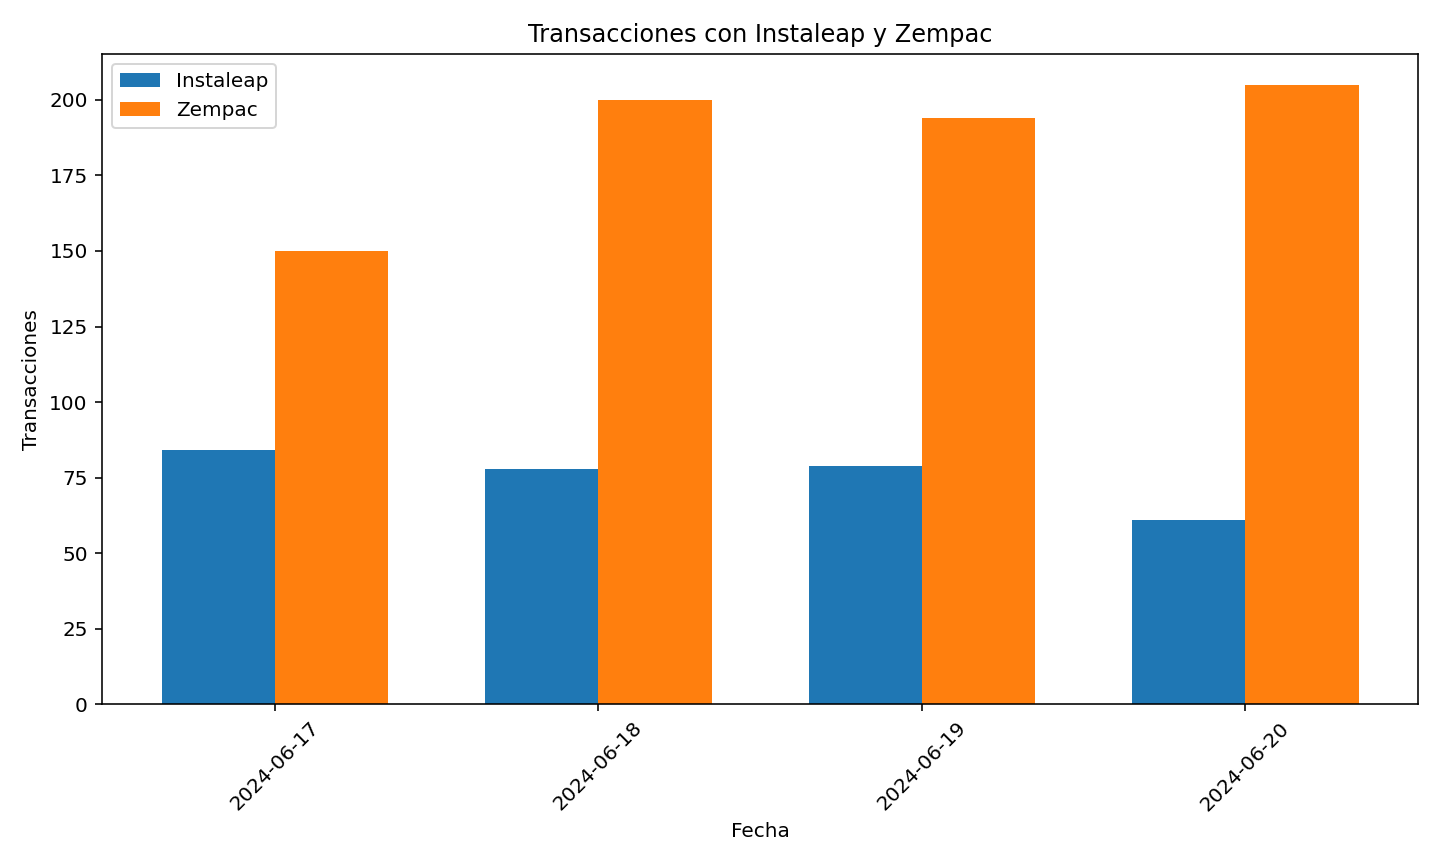

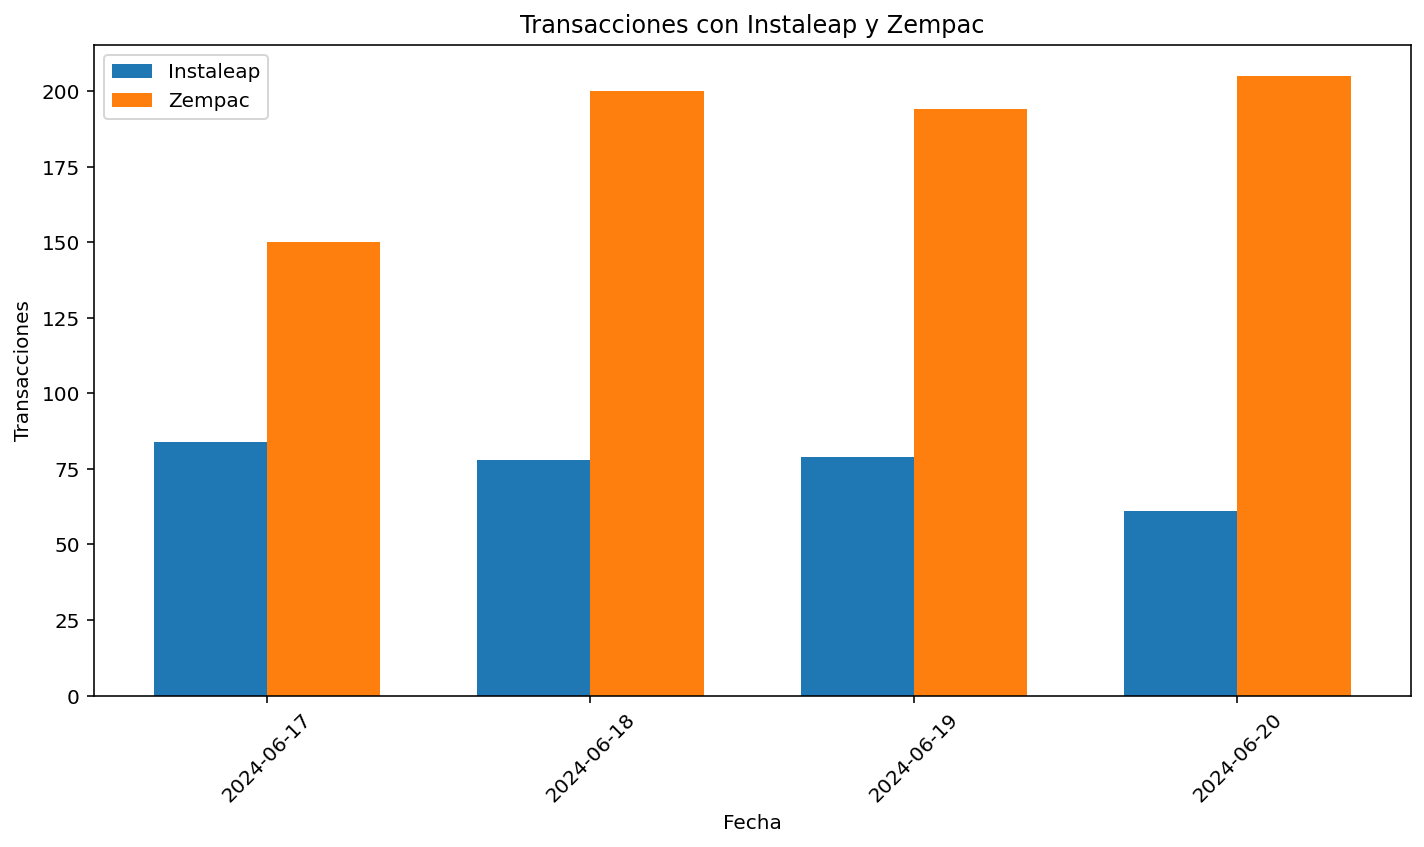

In [1]:
# Importa las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
pn.extension('plotly')

# Carga los datos desde el archivo CSV
data = pd.read_csv('data.csv')

# Verifica que las columnas se carguen correctamente
print("Columnas del DataFrame:", data.columns)

# Asegúrate de que las columnas esperadas están presentes
expected_columns = ['Fecha', 'Transacciones con Instaleap', 'Transacciones con Zempac', '% de Adopcion']
for col in expected_columns:
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no se encuentra en el DataFrame. Verifica el archivo CSV.")

# Convertir la columna 'Fecha' a formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Visualiza los primeros registros para verificar la correcta carga de datos
print(data.head())

# Grafico de barras: Transacciones con Instaleap vs Transacciones con Zempac
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(data))

bars1 = ax.bar(index, data['Transacciones con Instaleap'], bar_width, label='Instaleap')
bars2 = ax.bar([i + bar_width for i in index], data['Transacciones con Zempac'], bar_width, label='Zempac')

ax.set_xlabel('Fecha')
ax.set_ylabel('Transacciones')
ax.set_title('Transacciones con Instaleap y Zempac')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(data['Fecha'].dt.strftime('%Y-%m-%d'), rotation=45)
ax.legend()

plt.tight_layout()

# Convertir el gráfico de barras a un objeto Panel
bar_plot_pane = pn.pane.Matplotlib(fig)

# Grafico de lineas: % de Adopción
line_fig = px.line(data, x='Fecha', y='% de Adopcion', title='% de Adopción a lo largo del tiempo')

# Convertir el gráfico de líneas a un objeto Panel
line_plot_pane = pn.pane.Plotly(line_fig)

# Prepara el código para ser ejecutado con Voila y Panel
pn.extension()

# Crear el panel dashboard con los gráficos
kpi_markdown = pn.pane.Markdown("## Indicador de Adopción")

# Disposición del dashboard
dashboard = pn.Column(kpi_markdown, bar_plot_pane, line_plot_pane)
dashboard.servable()